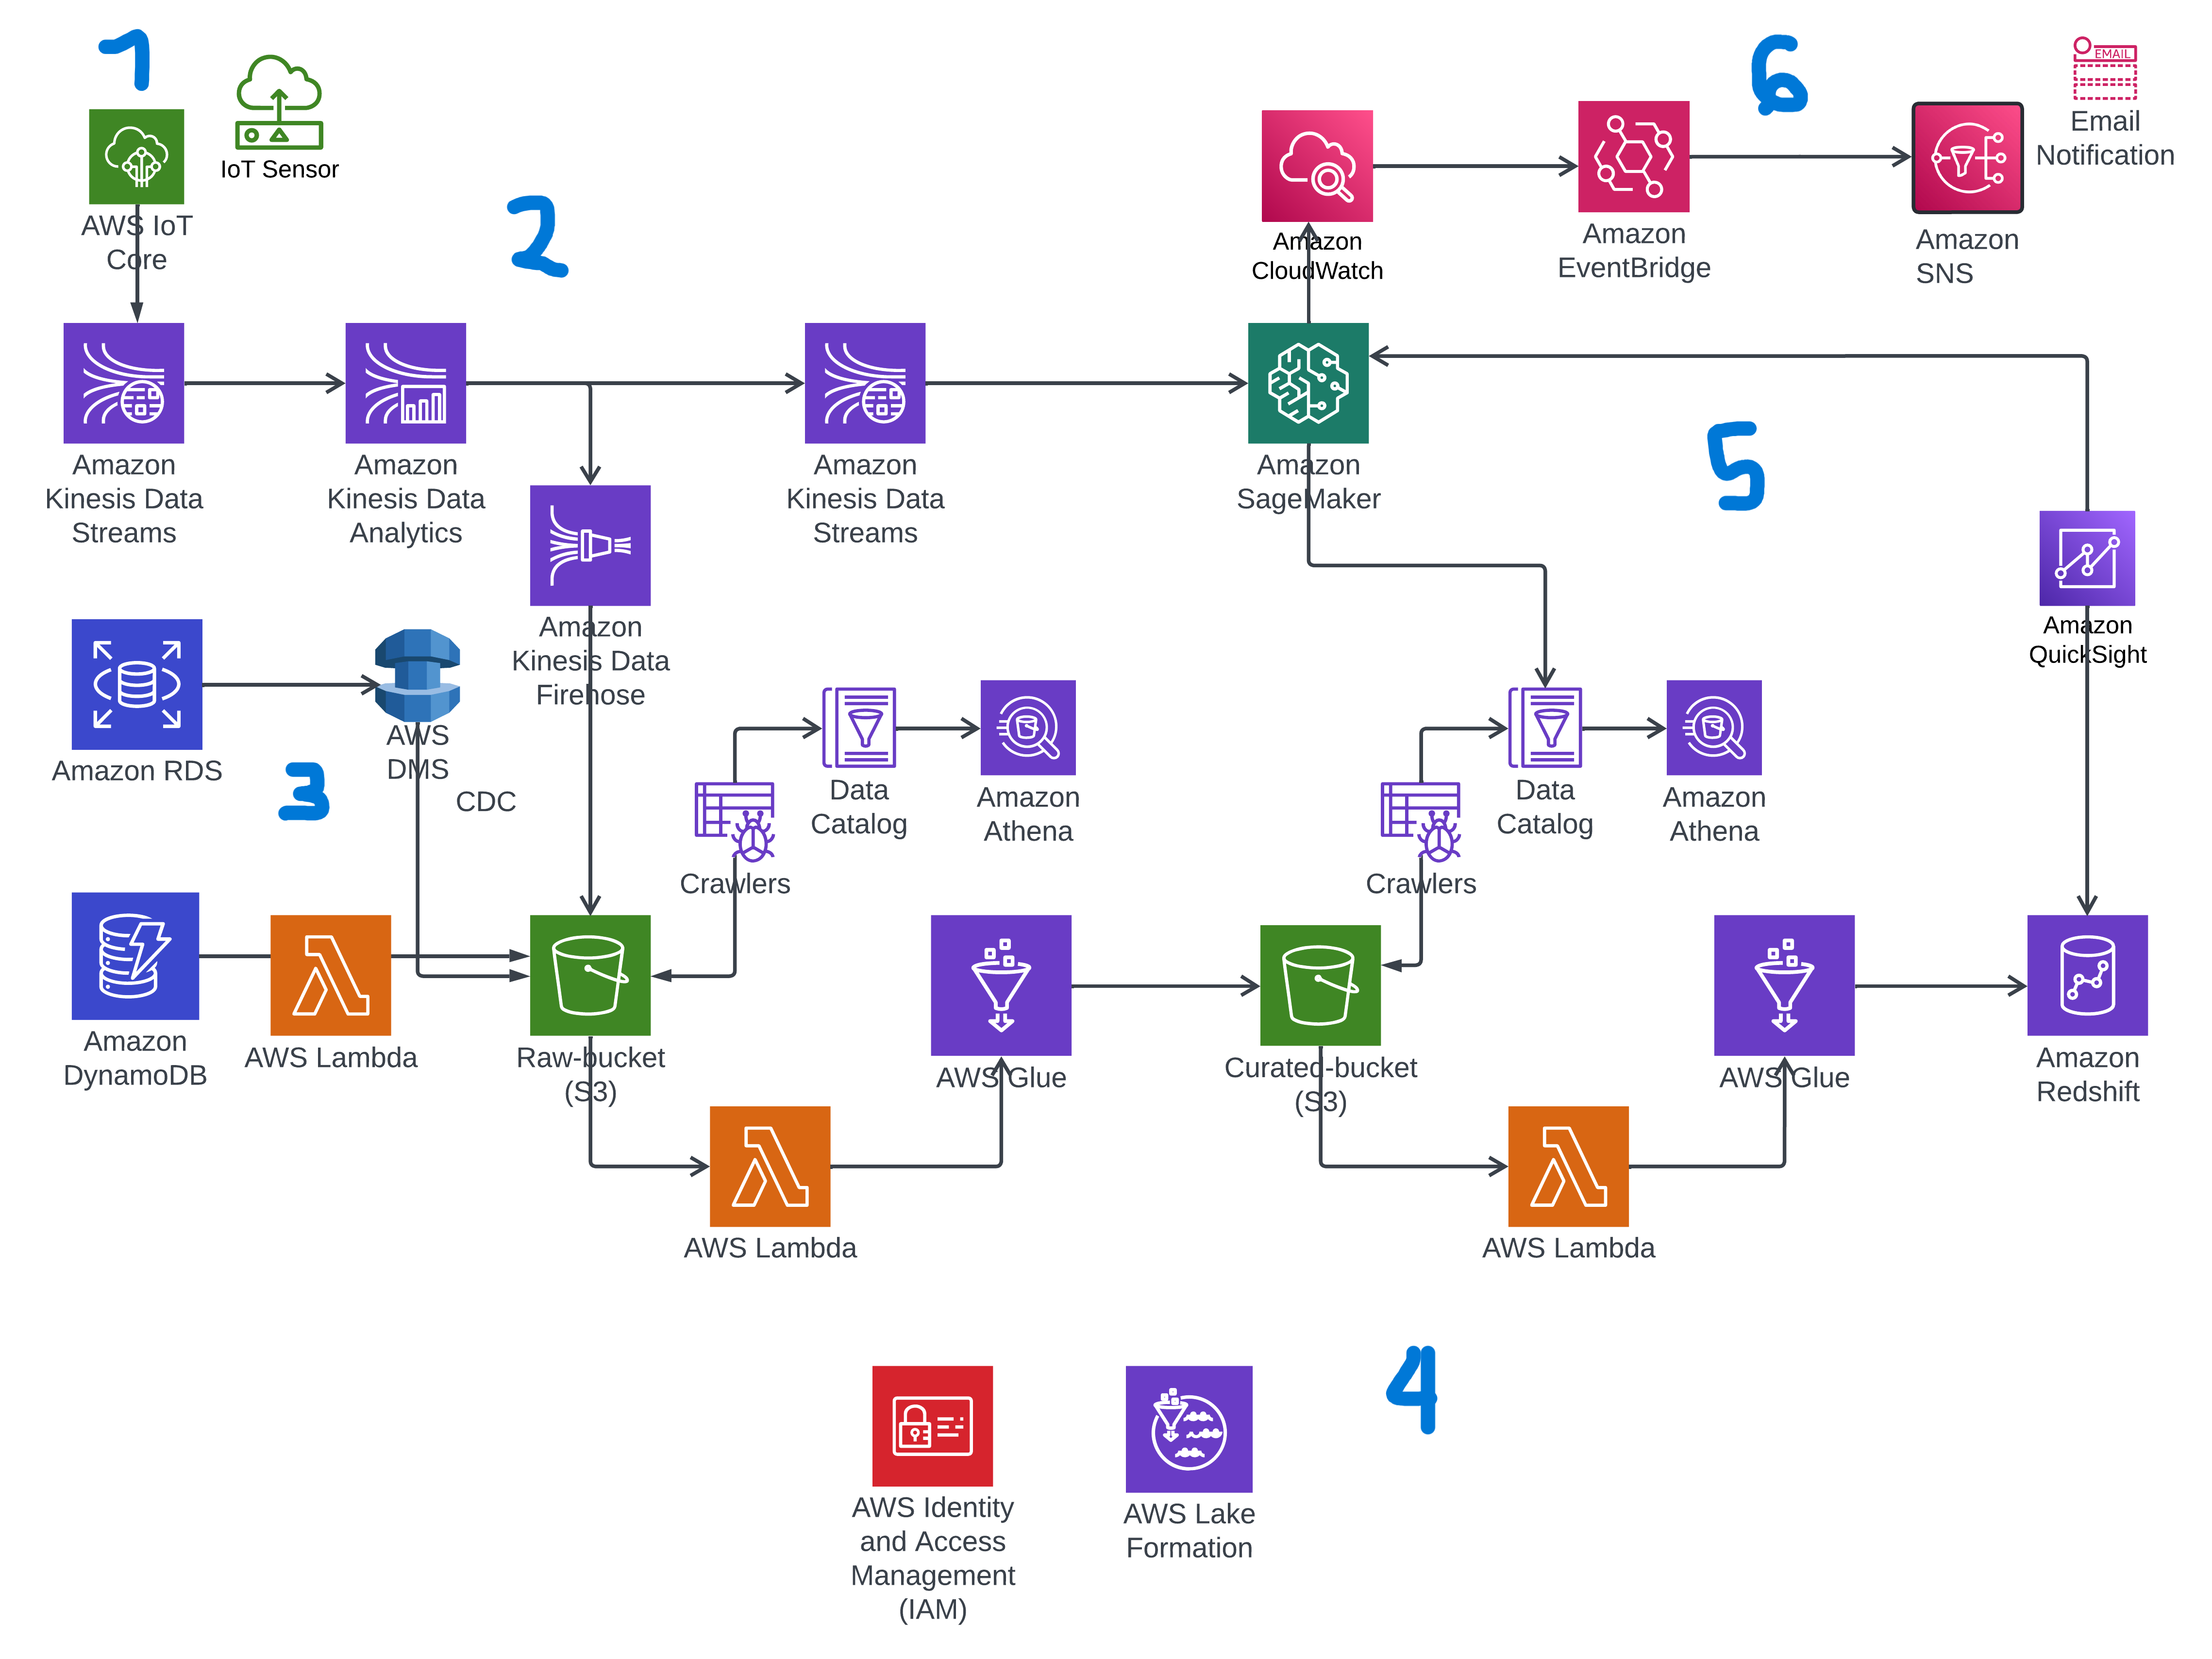

# Arquitectura Big Data en AWS para Prevención de Desabastecimientos

## Contexto

En la empresa gaseosas SA están trabajando en una solución analítica que sea capaz de procesar miles de datos de las ventas donde se describen comportamiento de compra y análisis previos hechos por vendedores a clientes con gran volumen de compra, de forma rápida y confiable mediante el uso de tecnologías Big Data de analítica, para entrenar un modelo que sea capaz de 
identificar los patrones de estas ventas y compararlos en tiempo real con los patrones de datos capturados de manera streaming por dispositivos implantados puntos de venta, para controlar tempranamente y evitar el desabastecimiento. 

Tu tarea es realizar un correcto diseño de la arquitectura para la solución analítica que podría soportar estos requerimientos. (Ilustra tu diseño y da una breve explicación de su funcionamiento), es importa definir el gobierno de datos y modelos de acuerdo a los perfiles

## Descripción General

La arquitectura está diseñada para manejar grandes volúmenes de datos, tanto en tiempo real como por lotes, con el objetivo de prevenir desabastecimientos mediante la identificación de patrones de compra y análisis de comportamiento. A continuación se describen los componentes clave y su función dentro del sistema:

### 1. **Productores de Datos**
Los datos provienen de varias fuentes, seleccionadas bajo la suposición de que estos servicios están presentes, aunque podrían ser sustituidos por otras fuentes similares según el caso:
- **IoT Sensor**: Captura datos en tiempo real desde puntos de venta.
- **Amazon RDS**: Base de datos transaccional que almacena información histórica de ventas.
- **Amazon DynamoDB**: Base de datos transaccional utilizada para registrar comportamientos de compra.

### 2. **Ingesta de Datos en Tiempo Real**
- **AWS IoT Core**: Enruta los datos capturados por los sensores IoT hacia **Amazon Kinesis Data Streams**.
- **Amazon Kinesis Data Analytics**: Procesa los datos en tiempo real, extrayendo insights útiles.
- **Amazon Kinesis Data Firehose**: Almacena los datos procesados en **raw-bucket (S3)** para su uso posterior.

### 3. **Ingesta de Datos Transaccionales por Lotes**
- **AWS DMS (Database Migration Service)**: Captura los cambios en las bases de datos transaccionales y los envía a **Kinesis Data Firehose**.
- **AWS Glue**: Procesa y transforma los datos almacenados en **raw-bucket (S3)**, guardándolos luego en **curated-bucket (S3)** con una estructura optimizada.
- **AWS Lambda**: Activa los **Jobs de AWS Glue** para iniciar el procesamiento de los datos por lotes.

### 4. **Gobernanza de Datos y Acceso**
- **AWS Glue Crawlers**: Registra y organiza los datos procesados en el **Data Catalog**.
- **AWS Lake Formation**: Gestiona la gobernanza de datos, asegurando políticas de acceso y seguridad.
- **AWS Identity and Access Management (IAM)**: Administra los permisos y roles para garantizar que cada servicio solo tenga acceso a los recursos necesarios. IAM asegura que las políticas de acceso sean granulares y específicas, limitando el acceso a los datos sensibles únicamente a los usuarios y servicios autorizados.


### 5. **Análisis y Modelado**
- **Amazon Athena**: Realiza consultas ad hoc sobre los datos almacenados en **curated-bucket (S3)** usando el **Data Catalog**.
- **Amazon Redshift**: Almacena y analiza grandes volúmenes de datos históricos.
- **Amazon SageMaker**: Entrena y despliega modelos de machine learning utilizando tanto datos en tiempo real (de **Kinesis Data Streams**) como históricos (de **Redshift** o **curated-bucket** a través del **Data Catalog**).

### 6. **Monitoreo y Notificaciones**
- **Amazon CloudWatch**: Monitorea métricas clave del modelo de machine learning, especialmente aquellas relacionadas con el abastecimiento de productos.
- **Amazon EventBridge**: Gestiona eventos basados en las reglas definidas y activa **Amazon SNS** para enviar notificaciones en caso de detección de posibles desabastecimientos.

## Recomendaciones
- **Amazon SageMaker** debe utilizar datos tanto de **Redshift** como del **Data Catalog** para aprovechar al máximo la información histórica y procesada.
- Implementar estrategias de particionamiento en **S3** es crucial para manejar eficientemente los miles de registros diarios, facilitando el procesamiento en **Glue** y el análisis en **Athena**.
- Considerar el uso de formatos de almacenamiento optimizados como **Apache Hudi**, **Delta Lake** o **Apache Iceberg** en **S3**. Estos formatos permiten transacciones ACID, mejor manejo de actualizaciones y eliminaciones, y particionamiento eficiente, lo cual es clave para gestionar grandes volúmenes de datos y realizar consultas rápidas en **Athena** y **Redshift**.
